In [4]:
import zipfile
from urllib import request
import os, sys

path_set14 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set14.zip"
filename="Set14.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
            
            
if not os.path.exists("tests/set14"):
    print("Downloading Set14 images")
    filehandler, _ = request.urlretrieve(path_set14, reporthook = _progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
print()
print("Set14 is all set!!")

In [5]:
import zipfile
from urllib import request

path_set5 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/Set5.zip"
filename="Set5"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/set5"):
    print("Downloading Set5 images")
    filehandler, _ = request.urlretrieve(path_set5, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
    
print()
print("Set5 is all set!!")


Set5 is all set!!


In [6]:
import zipfile
from urllib import request

path_bsd100 = r"https://github.com/titu1994/Super-Resolution-using-Generative-Adversarial-Networks/releases/download/v0.1/bsd100.zip"
filename="bsd100.zip"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests/set14"):
    print("Downloading BSD100 images")
    filehandler, _ = request.urlretrieve(path_bsd100, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    print()

    print("Extracting images")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests")
print()
print("BSD100 is all set")


BSD100 is all set


In [9]:
import zipfile
from urllib import request
import os, sys

path_coco = r"http://images.cocodataset.org/zips/train2014.zip"
filename="train2014"
def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()

if not os.path.exists("tests\coco"):
    print("Downloading Coco images")
    filehandler, _ = request.urlretrieve(path_coco, reporthook=_progress)
    zf = zipfile.ZipFile(filehandler)
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0
    print()
    print("Extracting images")

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")

    os.rename("tests/coco/train2014", "tests/coco/images")

    filename="annotations"
    path_cocoann = r"http://images.cocodataset.org/annotations/annotations_trainval2014.zip"

    print("Downloading Coco annotations")
    filehandler, _ = request.urlretrieve(path_cocoann, reporthook=_progress)

    zf = zipfile.ZipFile(filehandler)
    print()
    print("Extracting annotations")
    uncompress_size = sum((file.file_size for file in zf.infolist()))

    extracted_size = 0

    for file in zf.infolist():
        extracted_size += file.file_size
        sys.stdout.write('\rExtracting %.2f%%' % (float(extracted_size * 100/uncompress_size)))
        sys.stdout.flush()
        zf.extract(file, "tests/coco")
print()
print("Coco is all set!!")

Extracting annotations
Extracting 100.00%

In [2]:
from keras import backend as K
from keras.models import Model
from keras.layers import Input, add, concatenate, BatchNormalization, LeakyReLU, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.utils.data_utils import get_file

from keras_ops import fit as bypass_fit, smooth_gan_labels

from layers import Normalize, Denormalize, SubPixelUpscaling
from loss import AdversarialLossRegularizer, ContentVGGRegularizer, TVRegularizer, psnr, dummy_loss

import os
import time
import h5py
import numpy as np
import json
from imageio import imwrite as imsave
from skimage.transform import warp as imresize,resize
from scipy.ndimage.filters import gaussian_filter

TF_WEIGHTS_PATH_NO_TOP = r"https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"

if not os.path.exists("weights/"):
    os.makedirs("weights/")

if not os.path.exists("val_images/"):
    os.makedirs("val_images/")

if K.image_dim_ordering() == "th":
    channel_axis = 1
else:
    channel_axis = -1

class VGGNetwork:
    '''
    Helper class to load VGG and its weights to the FastNet model
    '''

    def __init__(self, img_width=384, img_height=384, vgg_weight=1.0):
        self.img_height = img_height
        self.img_width = img_width
        self.vgg_weight = vgg_weight

        self.vgg_layers = None

    def append_vgg_network(self, x_in, true_X_input, pre_train=False):

        # Append the initial inputs to the outputs of the SRResNet
        x = concatenate([x_in, true_X_input], axis=0)

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(name="normalize_vgg")(x)

        # Begin adding the VGG layers
        x = Conv2D(64, (3, 3), activation='relu', name='vgg_conv1_1', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(64, (3, 3), activation='relu', name='vgg_conv1_2', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool1')(x)

        x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_1', padding='same', kernel_initializer="glorot_uniform")(x)

        if pre_train:
            vgg_regularizer2 = ContentVGGRegularizer(weight=self.vgg_weight)
            x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_2', padding='same',
                              activity_regularizer=vgg_regularizer2, kernel_initializer="glorot_uniform")(x)
        else:
            x = Conv2D(128, (3, 3), activation='relu', name='vgg_conv2_2', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool2')(x)

        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_2', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(256, (3, 3), activation='relu', name='vgg_conv3_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool3')(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_2', padding='same', kernel_initializer="glorot_uniform")(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv4_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool4')(x)

        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_1', padding='same', kernel_initializer="glorot_uniform")(x)
        x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_2', padding='same', kernel_initializer="glorot_uniform")(x)

        if not pre_train:
            vgg_regularizer5 = ContentVGGRegularizer(weight=self.vgg_weight)
            x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_3', padding='same',
                          activity_regularizer=vgg_regularizer5, kernel_initializer="glorot_uniform")(x)
        else:
            x = Conv2D(512, (3, 3), activation='relu', name='vgg_conv5_3', padding='same', kernel_initializer="glorot_uniform")(x)
        x = MaxPooling2D(name='vgg_maxpool5')(x)

        return x

    def load_vgg_weight(self, model):
        # Loading VGG 16 weights
        if K.image_dim_ordering() == "th":
            weights = get_file('vgg16_weights_th_dim_ordering_th_kernels_notop.h5', THEANO_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        else:
            weights = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', TF_WEIGHTS_PATH_NO_TOP,
                                   cache_subdir='models')
        f = h5py.File(weights)

        layer_names = [name for name in f.attrs['layer_names']]

        if self.vgg_layers is None:
            self.vgg_layers = [layer for layer in model.layers
                               if 'vgg_' in layer.name]

        for i, layer in enumerate(self.vgg_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        # Freeze all VGG layers
        for layer in self.vgg_layers:
            layer.trainable = False

        return model


class DiscriminatorNetwork:

    def __init__(self, img_width=384, img_height=384, adversarial_loss_weight=1, small_model=False):
        self.img_width = img_width
        self.img_height = img_height
        self.adversarial_loss_weight = adversarial_loss_weight
        self.small_model = small_model

        self.k = 3
        self.mode = 2
        self.weights_path = "weights/Discriminator weights.h5"

        self.gan_layers = None

    def append_gan_network(self, true_X_input):

        # Normalize the inputs via custom VGG Normalization layer
        x = Normalize(type="gan", value=127.5, name="gan_normalize")(true_X_input)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_1', kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name="gan_lrelu1_1")(x)

        x = Conv2D(64, (self.k, self.k), padding='same', name='gan_conv1_2', strides=(2, 2), kernel_initializer="glorot_uniform")(x)
        x = LeakyReLU(0.3, name='gan_lrelu1_2')(x)
        x = BatchNormalization(axis=channel_axis, name='gan_batchnorm1_1')(x)

        filters = [128, 256] if self.small_model else [128, 256, 512]

        for i, num_filters in enumerate(filters):
            for j in range(2):
                strides = (2, 2) if j == 1 else (1, 1)
            
                x = Conv2D(num_filters, (self.k, self.k), padding='same', strides=strides,
                                  name='gan_conv%d_%d' % (i + 2, j + 1), kernel_initializer="glorot_uniform")(x)
                x = LeakyReLU(0.3, name='gan_lrelu_%d_%d' % (i + 2, j + 1))(x)
                x = BatchNormalization(axis=channel_axis, name='gan_batchnorm%d_%d' % (i + 2, j + 1))(x)

        x = Flatten(name='gan_flatten')(x)

        output_dim = 128 if self.small_model else 1024

        x = Dense(output_dim, name='gan_dense1')(x)
        x = LeakyReLU(0.3, name='gan_lrelu5')(x)

        gan_regulrizer = AdversarialLossRegularizer(weight=self.adversarial_loss_weight)
        x = Dense(2, activation="softmax", activity_regularizer=gan_regulrizer, name='gan_output')(x)

        return x

    def set_trainable(self, model, value=True):
        if self.gan_layers is None:
            disc_model = [layer for layer in model.layers
                          if 'model' in layer.name][0] # Only disc model is an inner model

            self.gan_layers = [layer for layer in disc_model.layers
                               if 'gan_' in layer.name]

        for layer in self.gan_layers:
            layer.trainable = value

    def load_gan_weights(self, model):
        f = h5py.File(self.weights_path)

        layer_names = [name for name in f.attrs['layer_names']]
        layer_names = layer_names[1:] # First is an input layer. Not needed.

        if self.gan_layers is None:
            self.gan_layers = [layer for layer in model.layers
                                if 'gan_' in layer.name]

        for i, layer in enumerate(self.gan_layers):
            g = f[layer_names[i]]
            weights = [g[name] for name in g.attrs['weight_names']]
            layer.set_weights(weights)

        print("GAN Model weights loaded.")
        return model

    def save_gan_weights(self, model):
        print('GAN Weights are being saved.')
        model.save_weights(self.weights_path, overwrite=True)
        print('GAN Weights saved.')


class GenerativeNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_upscales=2, small_model=False,
                 content_weight=1, tv_weight=2e5, gen_channels=64):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.small_model = small_model
        self.num_scales = num_upscales

        self.content_weight = content_weight
        self.tv_weight = tv_weight

        self.filters = gen_channels
        self.mode = 2
        self.init = 'glorot_uniform'

        self.sr_res_layers = None
        self.sr_weights_path = "weights/SRGAN.h5"

        self.output_func = None

    def create_sr_model(self, ip):

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_1')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr1')(x)

        x = Conv2D(self.filters, (5, 5), activation='linear', padding='same', name='sr_res_conv2', kernel_initializer="glorot_uniform")(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_2')(x)
        x = LeakyReLU(alpha=0.25, name='sr_res_lr2')(x)

        num_residual = 5 if self.small_model else 15

        for i in range(num_residual):
            x = self._residual_block(x, i + 1)

        for scale in range(self.num_scales):
            x = self._upscale_block(x, scale + 1)
    
        scale = 2 ** self.num_scales
        tv_regularizer = TVRegularizer(img_width=self.img_width * scale, img_height=self.img_height * scale,
                                       weight=self.tv_weight) #self.tv_weight)
        
        x = Conv2D(3, (5, 5), activation='tanh', padding='same', activity_regularizer=tv_regularizer, 
                   name='sr_res_conv_final', kernel_initializer=self.init)(x)
        
        x = Denormalize(name='sr_res_conv_denorm')(x)
        return x

    def _residual_block(self, ip, id):
        init = ip

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_1',
                          kernel_initializer=self.init)(ip)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_1')(x)
        x = LeakyReLU(alpha=0.25, name="sr_res_activation_" + str(id) + "_1")(x)

        x = Conv2D(self.filters, (3, 3), activation='linear', padding='same', name='sr_res_conv_' + str(id) + '_2',
                          kernel_initializer=self.init)(x)
        x = BatchNormalization(axis=channel_axis, name='sr_res_bn_' + str(id) + '_2')(x)

        m = add([x, init],name="sr_res_merge_" + str(id))

        return m

    def _upscale_block(self, ip, id):
        '''
        As per suggestion from http://distill.pub/2016/deconv-checkerboard/, I am swapping out
        SubPixelConvolution to simple Nearest Neighbour Upsampling
        '''
        init = ip
        
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_upconv1_%d' % id,
                          kernel_initializer=self.init)(init)
        x = LeakyReLU(alpha=0.25, name='sr_res_up_lr_%d_1_1' % id)(x)
        x = UpSampling2D(name='sr_res_upscale_%d' % id)(x)
        #x = SubPixelUpscaling(r=2, channels=32)(x)
        x = Conv2D(128, (3, 3), activation="linear", padding='same', name='sr_res_filter1_%d' % id,
                          kernel_initializer=self.init)(x)
        x = LeakyReLU(alpha=0.3, name='sr_res_up_lr_%d_1_2' % id)(x)

        return x

    def set_trainable(self, model, value=True):
        if self.sr_res_layers is None:
            self.sr_res_layers = [layer for layer in model.layers
                                    if 'sr_res_' in layer.name]

        for layer in self.sr_res_layers:
            layer.trainable = value

    def get_generator_output(self, input_img, srgan_model):
        if self.output_func is None:
            gen_output_layer = [layer for layer in srgan_model.layers
                                if layer.name == "sr_res_conv_denorm"][0]
            self.output_func = K.function([srgan_model.layers[0].input],
                                          [gen_output_layer.output])

        return self.output_func([input_img])


class SRGANNetwork:

    def __init__(self, img_width=96, img_height=96, batch_size=16, num_scales=2):
        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size
        self.num_scales = num_scales

        self.discriminative_network = None # type: DiscriminatorNetwork
        self.generative_network = None # type: GenerativeNetwork
        self.vgg_network = None # type: VGGNetwork

        self.srgan_model_ = None # type: Model
        self.generative_model_ = None # type: Model
        self.discriminative_model_ = None #type: Model

    def build_srgan_pretrain_model(self, use_small_srgan=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        vgg_output = self.vgg_network.append_vgg_network(sr_output, ip_vgg, pre_train=True)

        self.srgan_model_ = Model(input=[ip, ip_vgg],
                                  output=vgg_output)

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def build_discriminator_pretrain_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, self.num_scales,
                                                    use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator')  # Actual X images

        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)
        #self.generative_network.set_trainable(self.generative_model_, value=False)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)

        generator_out = self.generative_model_(ip)
        gan_output = self.discriminative_model_(generator_out)

        self.srgan_model_ = Model(input=ip, output=gan_output)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, loss='mse')
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, loss='categorical_crossentropy', metrics=['acc'])



        return self.discriminative_model_


    def build_srgan_model(self, use_small_srgan=False, use_small_discriminator=False):
        large_width = self.img_width * 4
        large_height = self.img_height * 4

        self.generative_network = GenerativeNetwork(self.img_width, self.img_height, self.batch_size, num_upscales=self.num_scales,
                                                    small_model=use_small_srgan)
        self.discriminative_network = DiscriminatorNetwork(large_width, large_height,
                                                           small_model=use_small_discriminator)
        self.vgg_network = VGGNetwork(large_width, large_height)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        ip_gan = Input(shape=(large_width, large_height, 3), name='x_discriminator') # Actual X images
        ip_vgg = Input(shape=(large_width, large_height, 3), name='x_vgg') # Actual X images
        sr_output = self.generative_network.create_sr_model(ip)
        self.generative_model_ = Model(ip, sr_output)

        gan_output = self.discriminative_network.append_gan_network(ip_gan)
        self.discriminative_model_ = Model(ip_gan, gan_output)        
        gan_output = self.discriminative_model_(self.generative_model_.output)
        vgg_output = self.vgg_network.append_vgg_network(self.generative_model_.output, ip_vgg)

        self.srgan_model_ = Model(input=[ip, ip_gan, ip_vgg], output=[gan_output, vgg_output])

        self.vgg_network.load_vgg_weight(self.srgan_model_)

        srgan_optimizer = Adam(lr=1e-4)
        generator_optimizer = Adam(lr=1e-4)
        discriminator_optimizer = Adam(lr=1e-4)

        self.generative_model_.compile(generator_optimizer, dummy_loss)
        self.discriminative_model_.compile(discriminator_optimizer, loss='categorical_crossentropy', metrics=['acc'])
        self.srgan_model_.compile(srgan_optimizer, dummy_loss)

        return self.srgan_model_


    def pre_train_srgan(self, image_dir, num_images=50000, epochs=1, use_small_srgan=False):
        self.build_srgan_pretrain_model(use_small_srgan=use_small_srgan)

        self._train_model(image_dir, num_images=num_images, epochs=epochs, pre_train_srgan=True,
                          load_generative_weights=True)

    def pre_train_discriminator(self, image_dir, num_images=50000, epochs=1, batch_size=128,
                                use_small_discriminator=False):

        self.batch_size = batch_size
        self.build_discriminator_pretrain_model(use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, pre_train_discriminator=True,
                          load_generative_weights=True)

    def train_full_model(self, image_dir, num_images=50000, epochs=10, use_small_srgan=False,
                         use_small_discriminator=False):

        self.build_srgan_model(use_small_srgan, use_small_discriminator)

        self._train_model(image_dir, num_images, epochs, load_generative_weights=True, load_discriminator_weights=True)

    def _train_model(self, image_dir, num_images=80000, epochs=10, pre_train_srgan=False,
                     pre_train_discriminator=False, load_generative_weights=False, load_discriminator_weights=False,
                     save_loss=True, disc_train_flip=0.1):

        assert self.img_width >= 16, "Minimum image width must be at least 16"
        assert self.img_height >= 16, "Minimum image height must be at least 16"

        if load_generative_weights:
            try:
                self.generative_model_.load_weights(self.generative_network.sr_weights_path)
                print("Generator weights loaded.")
            except:
                print("Could not load generator weights.")

        if load_discriminator_weights:
            try:
                self.discriminative_network.load_gan_weights(self.srgan_model_)
                print("Discriminator weights loaded.")
            except:
                print("Could not load discriminator weights.")

        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        if save_loss:
            if pre_train_srgan:
                loss_history = {'generator_loss' : [],
                                'val_psnr' : [], }
            elif pre_train_discriminator:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [], }
            else:
                loss_history = {'discriminator_loss' : [],
                                'discriminator_acc' : [],
                                'generator_loss' : [],
                                'val_psnr': [], }

        y_vgg_dummy = np.zeros((self.batch_size * 2, 3, img_width // 32, img_height // 32)) # 5 Max Pools = 2 ** 5 = 32

        print("Training SRGAN network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))
            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):
                try:
                    t1 = time.time()

                    if not pre_train_srgan and not pre_train_discriminator:
                        x_vgg = x.copy() * 255 # VGG input [0 - 255 scale]

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))
                    def shift_down(xy):                        
                        return xy
                    
                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.1)
                        img = imresize(img, inverse_map=shift_down, output_shape=(self.img_width, self.img_height, 3), order=3)
                        #img = resize(img, (self.img_width, self.img_height))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 and not pre_train_discriminator:
                        print("Validation image..")
                        output_image_batch = self.generative_network.get_generator_output(x_generator,
                                                                                          self.srgan_model_)
                        if type(output_image_batch) == list:
                            output_image_batch = output_image_batch[0]

                        mean_axis = (0, 2, 3) if K.image_dim_ordering() == 'th' else (0, 1, 2)

                        average_psnr = 0.0

                        print('gen img mean :', np.mean(output_image_batch / 255., axis=mean_axis))
                        print('val img mean :', np.mean(x, axis=mean_axis))

                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], np.clip(output_image_batch[x_i], 0, 255) / 255.)

                        average_psnr /= self.batch_size

                        if save_loss:
                            loss_history['val_psnr'].append(average_psnr)

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = "val_images/epoch_%d_iteration_%d_num_%d_real_.png" % (i + 1, iteration, x_i + 1)
                            generated_path = "val_images/epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                                        iteration,
                                                                                                        x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    if pre_train_srgan:
                        # Train only generator + vgg network

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist = bypass_fit(self.srgan_model_, [x_generator, x * 255], y_vgg_dummy,
                                                     batch_size=self.batch_size, epochs=1, verbose=0)
                        sr_loss = hist.history['loss'][0]

                        if save_loss:
                            loss_history['generator_loss'].extend(hist.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = sr_loss

                        improvement = (prev_improvement - sr_loss) / prev_improvement * 100
                        prev_improvement = sr_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/steps | "
                              "GLoss: %0.2f" % (iteration, num_images, improvement, t2 - t1, sr_loss))
                    elif pre_train_discriminator:
                        # Train only discriminator
                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist = self.discriminative_model_.fit(X, y_gan, batch_size=self.batch_size,
                                                              epochs=1, verbose=0)

                        discriminator_loss = hist.history['loss'][-1]
                        discriminator_acc = hist.history['acc'][-1]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist.history['loss'])
                            loss_history['discriminator_acc'].extend(hist.history['acc'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()

                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | "
                            "DLoss/Acc : %0.4f / %0.2f" % (iteration, num_images,
                                                            improvement, t2 - t1,
                                                            discriminator_loss, discriminator_acc))

                    else:
                        # Train only discriminator, disable training of srgan
                        self.discriminative_network.set_trainable(self.srgan_model_, value=True)
                        self.generative_network.set_trainable(self.srgan_model_, value=False)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        # hist = bypass_fit(self.srgan_model_, [x_generator, x * 255, x_vgg],
                        #                          [y_gan, y_vgg_dummy],
                        #                          batch_size=self.batch_size, epochs=1, verbose=0)

                        X_pred = self.generative_model_.predict(x_generator, self.batch_size)

                        X = np.concatenate((X_pred, x * 255))

                        # Using soft and noisy labels
                        if np.random.uniform() > disc_train_flip:
                            # give correct classifications
                            y_gan = [0] * self.batch_size + [1] * self.batch_size
                        else:
                            # give wrong classifications (noisy labels)
                            y_gan = [1] * self.batch_size + [0] * self.batch_size

                        y_gan = np.asarray(y_gan, dtype=np.int).reshape(-1, 1)
                        y_gan = to_categorical(y_gan, num_classes=2)
                        y_gan = smooth_gan_labels(y_gan)

                        hist1 = self.discriminative_model_.fit(X, y_gan, verbose=0, batch_size=self.batch_size,
                                                              epochs=1)

                        discriminator_loss = hist1.history['loss'][-1]

                        # Train only generator, disable training of discriminator
                        self.discriminative_network.set_trainable(self.srgan_model_, value=False)
                        self.generative_network.set_trainable(self.srgan_model_, value=True)

                        # Using soft labels
                        y_model = [1] * self.batch_size
                        y_model = np.asarray(y_model, dtype=np.int).reshape(-1, 1)
                        y_model = to_categorical(y_model, num_classes=2)
                        y_model = smooth_gan_labels(y_model)

                        # Use custom bypass_fit to bypass the check for same input and output batch size
                        hist2 = bypass_fit(self.srgan_model_, [x_generator, x, x_vgg], [y_model, y_vgg_dummy],
                                           batch_size=self.batch_size, epochs=1, verbose=0)

                        generative_loss = hist2.history['loss'][0]

                        if save_loss:
                            loss_history['discriminator_loss'].extend(hist1.history['loss'])
                            loss_history['discriminator_acc'].extend(hist1.history['acc'])
                            loss_history['generator_loss'].extend(hist2.history['loss'])

                        if prev_improvement == -1:
                            prev_improvement = discriminator_loss

                        improvement = (prev_improvement - discriminator_loss) / prev_improvement * 100
                        prev_improvement = discriminator_loss

                        iteration += self.batch_size
                        t2 = time.time()
                        print("%d / %d | Improvement : %0.2f %% | %0.2f s/step | DLoss : %0.3f | GLoss : %0.3f" %
                              (iteration, num_images, improvement, t2 - t1, discriminator_loss, generative_loss))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving model weights.")
                        # Save predictive (SR network) weights
                        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
                        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")
        # Save predictive (SR network) weights
        self._save_model_weights(pre_train_srgan, pre_train_discriminator)
        self._save_loss_history(loss_history, pre_train_srgan, pre_train_discriminator, save_loss)

    def _save_model_weights(self, pre_train_srgan, pre_train_discriminator):
        if not pre_train_discriminator:
            self.generative_model_.save_weights(self.generative_network.sr_weights_path, overwrite=True)

        if not pre_train_srgan:
            # Save GAN (discriminative network) weights
            self.discriminative_network.save_gan_weights(self.discriminative_model_)

    def _save_loss_history(self, loss_history, pre_train_srgan, pre_train_discriminator, save_loss):
        if save_loss:
            print("Saving loss history")

            if pre_train_srgan:
                with open('pretrain losses - srgan.json', 'w') as f:
                    json.dump(loss_history, f)
            elif pre_train_discriminator:
                with open('pretrain losses - discriminator.json', 'w') as f:
                    json.dump(loss_history, f)
            else:
                with open('fulltrain losses.json', 'w') as f:
                    json.dump(loss_history, f)

            print("Saved loss history")


if __name__ == "__main__":
    from keras.utils.vis_utils import plot_model

    # Path to MS COCO dataset
    coco_path = r"tests/coco"

    '''
    Base Network manager for the SRGAN model

    Width / Height = 32 to reduce the memory requirement for the discriminator.

    Batch size = 1 is slower, but uses the least amount of gpu memory, and also acts as
    Instance Normalization (batch norm with 1 input image) which speeds up training slightly.
    '''

    srgan_network = SRGANNetwork(img_width=32, img_height=32, batch_size=1)
    srgan_network.build_srgan_model()
    #plot(srgan_network.srgan_model_, 'SRGAN.png', show_shapes=True)

    # Pretrain the SRGAN network
    #srgan_network.pre_train_srgan(coco_path, num_images=80000, epochs=1)

    # Pretrain the discriminator network
    #srgan_network.pre_train_discriminator(coco_path, num_images=40000, epochs=1, batch_size=16)

    # Fully train the SRGAN with VGG loss and Discriminator loss
    #srgan_network.train_full_model(coco_path, num_images=80000, epochs=5)













d:\anaconda\envs\stable\lib\site-packages\ipykernel_launcher.py:417: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Data loaded.


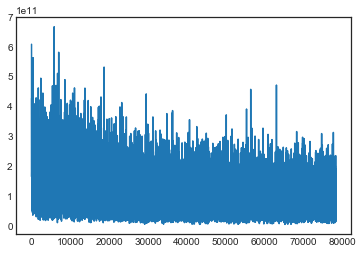

Mean gan loss : 104214930352.7259
Std gan loss :  53464096423.831406
Min gan loss :  5258374656.0


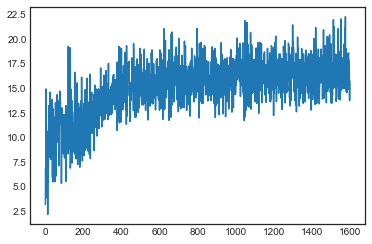

Mean psnr loss : 15.016748608649708
Std psnr loss :  2.814803003212561
Min psnr loss :  2.1780195832252502
Data loaded.


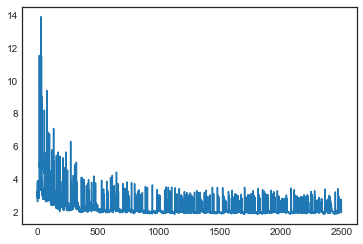

Mean discriminator loss : 2.2773863199949265
Std discriminator loss :  0.7070330677792672
Min discriminator loss :  1.8584706783294678


In [8]:
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('white')

import json
import numpy as np

with open("pretrain losses - srgan.json") as f:
    data = json.load(f)

print("Data loaded.")

# plot the generator loss values
plt.plot(data['generator_loss'])
plt.show()

print("Mean gan loss :", np.mean(data['generator_loss']))
print("Std gan loss : ", np.std(data['generator_loss']))
print("Min gan loss : ", np.min(data['generator_loss']))

# plot the PSNR loss values
plt.plot(data['val_psnr'])
plt.show()

print("Mean psnr loss :", np.mean(data['val_psnr']))
print("Std psnr loss : ", np.std(data['val_psnr']))
print("Min psnr loss : ", np.min(data['val_psnr']))

with open("pretrain losses - discriminator.json") as f:
    data = json.load(f)

print("Data loaded.")

# plot the discriminator loss values
plt.plot(data['discriminator_loss'])
plt.show()

print("Mean discriminator loss :", np.mean(data['discriminator_loss']))
print("Std discriminator loss : ", np.std(data['discriminator_loss']))
print("Min discriminator loss : ", np.min(data['discriminator_loss']))

In [4]:
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import sys
sys.path.append("..")

#import models
from loss import PSNRLoss, psnr

import os
import time
import numpy as np
from imageio import imwrite as imsave
from skimage.transform import resize as imresize
from scipy.ndimage.filters import gaussian_filter

base_weights_path = "weights/"
base_val_images_path = "val_images/"
base_test_images = "test_images/"

set5_path = r"tests\set5"
set14_path = r"tests\set14"
bsd100_path = r"tests\bsd100"

if not os.path.exists(base_weights_path):
    os.makedirs(base_weights_path)

if not os.path.exists(base_val_images_path):
    os.makedirs(base_val_images_path)

if not os.path.exists(base_test_images):
    os.makedirs(base_test_images)

def test_set5(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 5 Validation images")
    total_psnr = _test_loop(set5_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "set5", 5)

    print("Average PSNR of Set5 validation images : ", total_psnr / 5)
    print()


def test_set14(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on Set 14 Validation images")
    total_psnr = _test_loop(set14_path, batch_size, datagen, img_height, img_width, iteration, large_img_height,
                            large_img_width, model, total_psnr, "set14", 14)

    print("Average PSNR of Set5 validation images : ", total_psnr / 14)
    print()

def test_bsd100(model : Model, img_width=32, img_height=32, batch_size=1):
    datagen = ImageDataGenerator(rescale=1. / 255)
    large_img_width = img_width * 4
    large_img_height = img_height * 4

    iteration = 0
    total_psnr = 0.0

    print("Testing model on BSD 100 Validation images")
    total_psnr = _test_loop(bsd100_path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width,
                            model, total_psnr, "bsd100", 100)

    print("Average PSNR of BSD100 validation images : ", total_psnr / 100)
    print()


def _test_loop(path, batch_size, datagen, img_height, img_width, iteration, large_img_height, large_img_width, model,
               total_psnr, prefix, num_images):
    for x in datagen.flow_from_directory(path, class_mode=None, batch_size=batch_size,
                                         target_size=(large_img_width, large_img_height)):
        t1 = time.time()

        # resize images
        x_temp = x.copy()
        x_temp = x_temp.transpose((0, 2, 3, 1))

        x_generator = np.empty((batch_size, img_width, img_height, 3))

        for j in range(batch_size):
            img = imresize(x_temp[j], (img_width, img_height))
            x_generator[j, :, :, :] = img

        x_generator = x_generator.transpose((0, 3, 1, 2))

        output_image_batch = model.predict_on_batch(x_generator)

        average_psnr = 0.0
        for x_i in range(batch_size):
            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)
            total_psnr += average_psnr

        average_psnr /= batch_size

        iteration += batch_size
        t2 = time.time()

        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
              (t2 - t1, batch_size, average_psnr))

        for x_i in range(batch_size):
            real_path = base_test_images + prefix + "_iteration_%d_num_%d_real_.png" % (iteration, x_i + 1)
            generated_path = base_test_images + prefix + "_iteration_%d_num_%d_generated.png" % (iteration, x_i + 1)

            val_x = x[x_i].copy() * 255.
            val_x = val_x.transpose((1, 2, 0))
            val_x = np.clip(val_x, 0, 255).astype('uint8')

            output_image = output_image_batch[x_i]
            output_image = output_image.transpose((1, 2, 0))
            output_image = np.clip(output_image, 0, 255).astype('uint8')

            imsave(real_path, val_x[:,:,0])
            imsave(generated_path, output_image[:,:,0])

        if iteration >= num_images:
            break
    return total_psnr


class SRResNetTest:

    def __init__(self, img_width=96, img_height=96, batch_size=16):
        assert img_width >= 16, "Minimum image width must be at least 16"
        assert img_height >= 16, "Minimum image height must be at least 16"

        self.img_width = img_width
        self.img_height = img_height
        self.batch_size = batch_size

        self.model = None # type: Model
        self.weights_path = base_weights_path + "sr_resnet_weights.h5"

    def build_model(self, load_weights=False) -> Model:
        sr_resnet = GenerativeNetwork(self.img_width, self.img_height, self.batch_size)

        ip = Input(shape=(self.img_width, self.img_height, 3), name='x_generator')
        output = sr_resnet.create_sr_model(ip)

        self.model = Model(ip, output)

        optimizer = Adam(lr=1e-4)
        self.model.compile(optimizer, loss='mse', metrics=[PSNRLoss])

        if load_weights:
            try:
                self.model.load_weights(self.weights_path)
                print("SR ResNet model weights loaded.")
            except Exception:
                print("Weight for SR ResNet model not found or are incorrect size. Cannot load weights.")

                response = input("Continue without loading weights? 'y' or 'n' ")
                if response == 'n':
                    exit()

        return self.model

    def train_model(self, image_dir, num_images=50000, epochs=1):
        datagen = ImageDataGenerator(rescale=1. / 255)
        img_width = self.img_width * 4
        img_height = self.img_height * 4

        early_stop = False
        iteration = 0
        prev_improvement = -1

        print("Training SR ResNet network")
        for i in range(epochs):
            print()
            print("Epoch : %d" % (i + 1))

            for x in datagen.flow_from_directory(image_dir, class_mode=None, batch_size=self.batch_size,
                                                 target_size=(img_width, img_height)):

                try:
                    t1 = time.time()

                    # resize images
                    x_temp = x.copy()
                    x_temp = x_temp.transpose((0, 2, 3, 1))

                    x_generator = np.empty((self.batch_size, self.img_width, self.img_height, 3))

                    for j in range(self.batch_size):
                        img = gaussian_filter(x_temp[j], sigma=0.5)
                        img = imresize(img, (self.img_width, self.img_height,3))
                        x_generator[j, :, :, :] = img

                    #x_generator = x_generator.transpose((0, 3, 1, 2))

                    if iteration % 50 == 0 and iteration != 0 :
                        print("Random Validation image..")
                        output_image_batch = self.model.predict_on_batch(x_generator)

                        print("Pred Max / Min: %0.2f / %0.2f" % (output_image_batch.max(),
                                                                 output_image_batch.min()))

                        average_psnr = 0.0
                        for x_i in range(self.batch_size):
                            average_psnr += psnr(x[x_i], output_image_batch[x_i] / 255.)

                        average_psnr /= self.batch_size

                        iteration += self.batch_size
                        t2 = time.time()

                        print("Time required : %0.2f. Average validation PSNR over %d samples = %0.2f" %
                              (t2 - t1, self.batch_size, average_psnr))

                        for x_i in range(self.batch_size):
                            real_path = base_val_images_path + "epoch_%d_iteration_%d_num_%d_real_.png" % \
                                                               (i + 1, iteration, x_i + 1)

                            generated_path = base_val_images_path + \
                                             "epoch_%d_iteration_%d_num_%d_generated.png" % (i + 1,
                                                                                            iteration,
                                                                                            x_i + 1)

                            val_x = x[x_i].copy() * 255.
                            val_x = val_x.transpose((1, 2, 0))
                            val_x = np.clip(val_x, 0, 255).astype('uint8')

                            output_image = output_image_batch[x_i]
                            output_image = output_image.transpose((1, 2, 0))
                            output_image = np.clip(output_image, 0, 255).astype('uint8')

                            imsave(real_path, val_x[:,:,0])
                            imsave(generated_path, output_image[:,:,0])

                        '''
                        Don't train of validation images for now.

                        Note that if epochs > 1, there is a chance that
                        validation images may be used for training purposes as well.

                        In that case, this isn't strictly a validation measure, instead of
                        just a check to see what the network has learned.
                        '''
                        continue

                    hist = self.model.fit(x_generator, x * 255, batch_size=self.batch_size, epochs=1, verbose=0)
                    psnr_loss_val = hist.history['PSNRLoss'][0]

                    if prev_improvement == -1:
                        prev_improvement = psnr_loss_val

                    improvement = (prev_improvement - psnr_loss_val) / prev_improvement * 100
                    prev_improvement = psnr_loss_val

                    iteration += self.batch_size
                    t2 = time.time()

                    print("%d / %d | Improvement : %0.2f %% | Time required : %0.2f s/step | "
                          "PSNR : %0.3f" % (iteration, num_images, improvement, t2 - t1, psnr_loss_val))

                    if iteration % 1000 == 0 and iteration != 0:
                        print("Saving weights")
                        self.model.save_weights(self.weights_path, overwrite=True)

                    if iteration >= num_images:
                        break

                except KeyboardInterrupt:
                    print("Keyboard interrupt detected. Stopping early.")
                    early_stop = True
                    break

            iteration = 0

            if early_stop:
                break

        print("Finished training SRGAN network. Saving model weights.")


if __name__ == "__main__":
    from keras.utils.vis_utils import plot_model as plot

    coco_path = r"D:\dataset\coco2014"

    img_width = img_height = 64

    sr_resnet_test = SRResNetTest(img_width=img_width, img_height=img_height, batch_size=1)
    sr_resnet_test.build_model(load_weights=False)
    #plot(sr_resnet_test.model, to_file='sr_resnet.png', show_shapes=True)

    #sr_resnet_test.train_model(coco_path, num_images=50000, epochs=1)

    test_set5(sr_resnet_test.model, img_width=img_width, img_height=img_height)
    test_set14(sr_resnet_test.model, img_width=img_width, img_height=img_height)
    test_bsd100(sr_resnet_test.model, img_width=img_width, img_height=img_height)


Testing model on Set 5 Validation images
Found 0 images belonging to 0 classes.


ZeroDivisionError: integer division or modulo by zero